In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [7]:
import pandas as pd
import zipfile
import io
import requests

# Download the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

# Open the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print(z.namelist())  # List files in the ZIP to confirm structure
    
    # Extract and read the correct CSV file
    with z.open('bank-additional/bank-additional.csv') as file:
        bank_data = pd.read_csv(file, sep=';')

# Display basic info
print(bank_data.head())
print(bank_data.info())


['bank-additional/', 'bank-additional/.DS_Store', '__MACOSX/', '__MACOSX/bank-additional/', '__MACOSX/bank-additional/._.DS_Store', 'bank-additional/.Rhistory', 'bank-additional/bank-additional-full.csv', 'bank-additional/bank-additional-names.txt', 'bank-additional/bank-additional.csv', '__MACOSX/._bank-additional']
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999        

In [8]:
# Handle categorical variables with Label Encoding
label_encoder = LabelEncoder()
for col in bank_data.select_dtypes(include='object').columns:
    bank_data[col] = label_encoder.fit_transform(bank_data[col])

# Check for missing values
print(bank_data.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


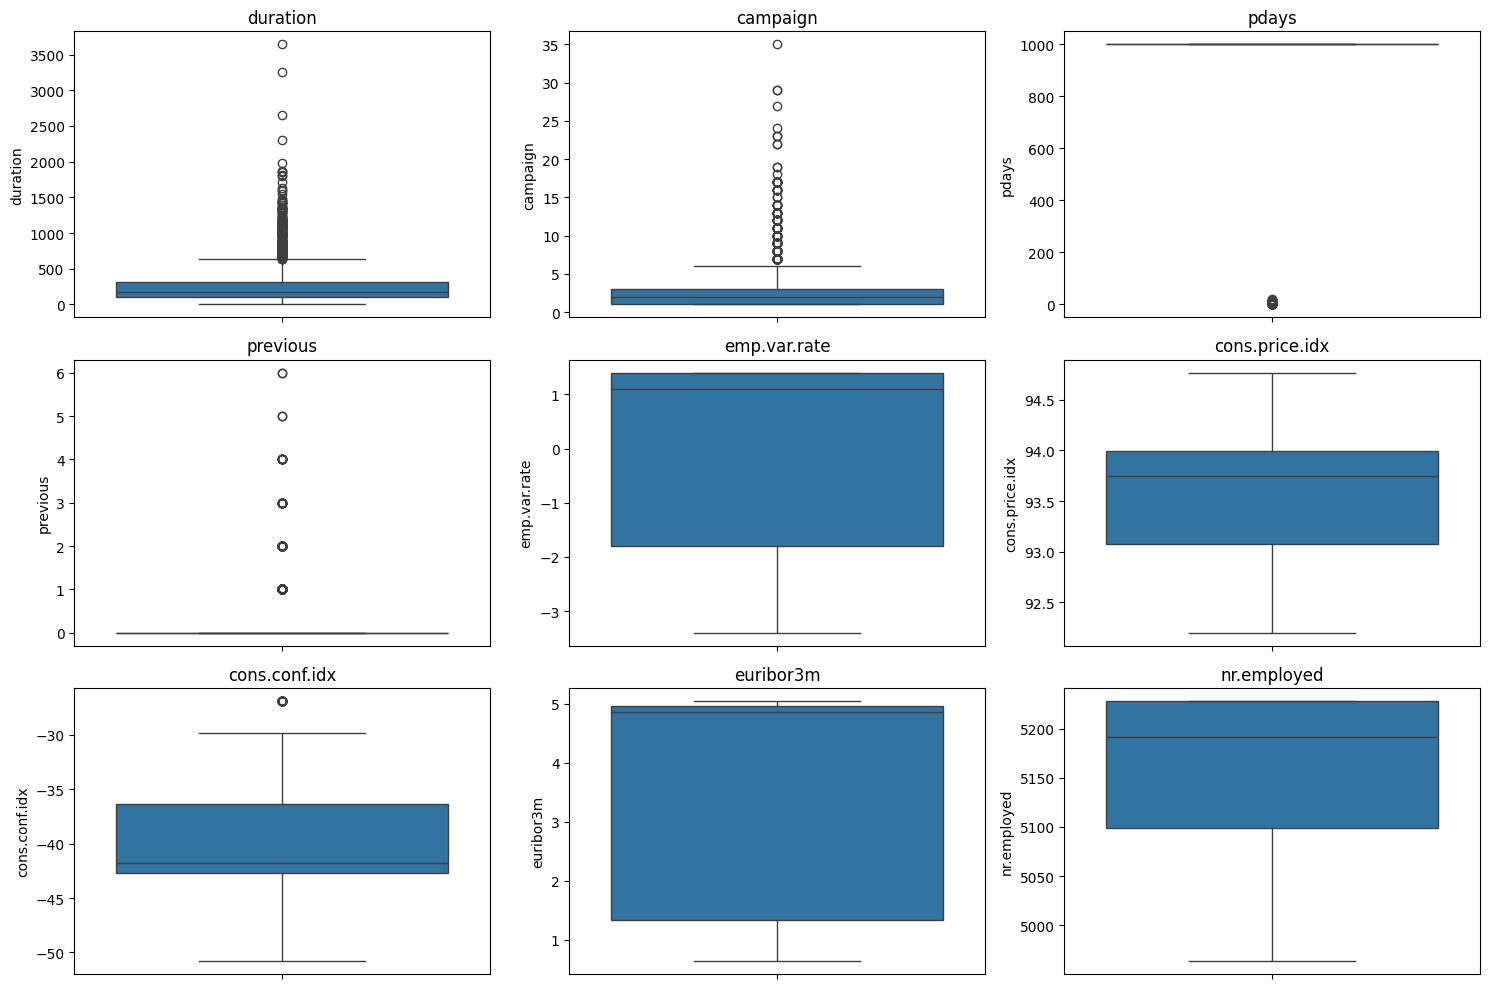

In [9]:
# List of columns for boxplots
features = ['duration', 'campaign', 'pdays', 'previous', 
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=bank_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [10]:
# Define features and target variable
X = bank_data.drop(['y'], axis=1)  # 'y' is the target
y = bank_data['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


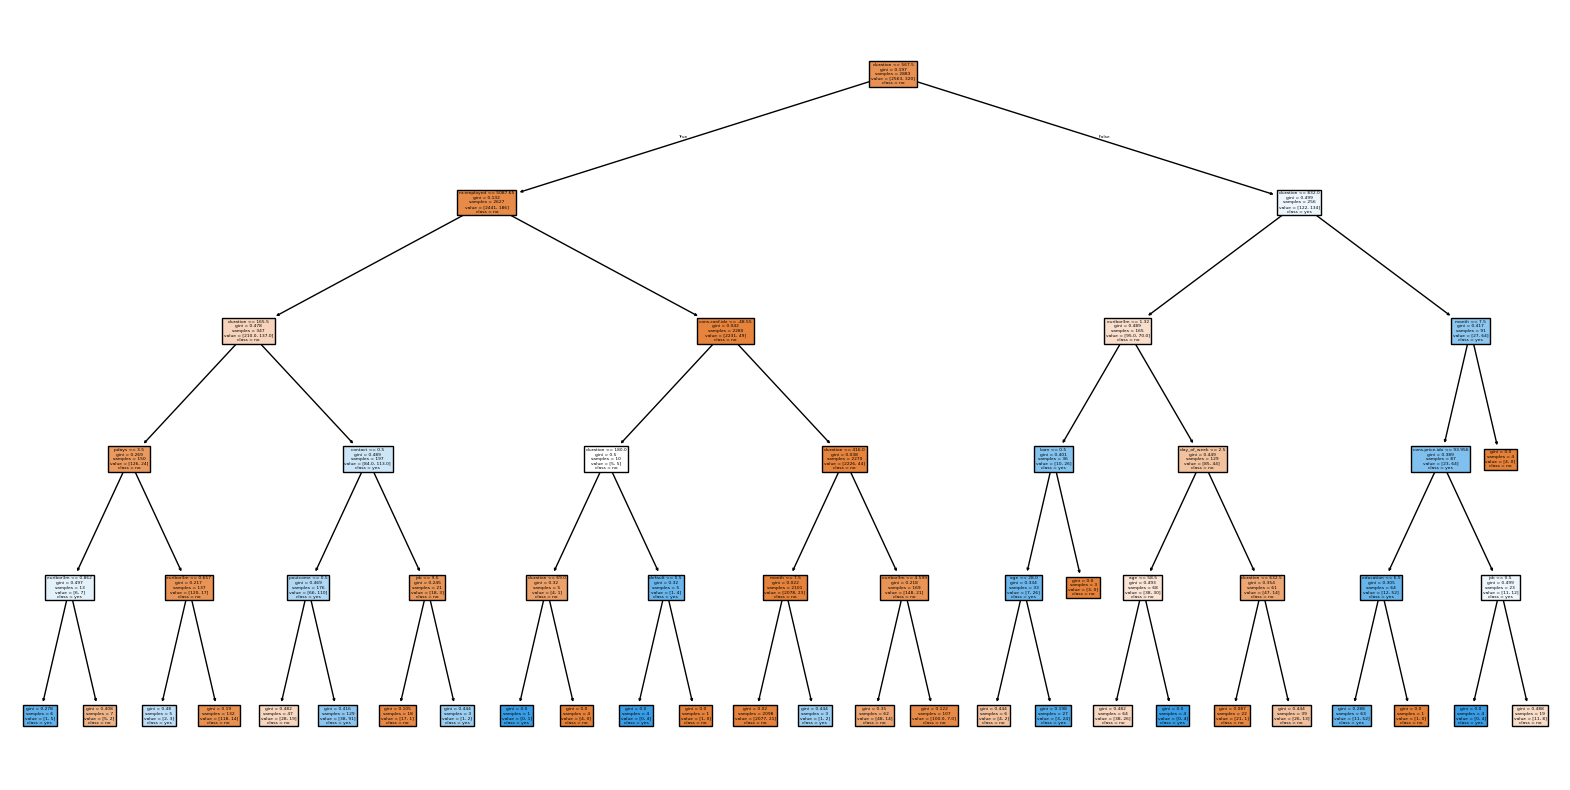

In [11]:
# Initialize and train Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()
